### Semana 4 - Actividad 1
### Reducción de características de un conjunto de datos para encontrar sus componentes principales y mejorar su interpretabilidad con la menor pérdida de información posible.

Lázaro Lara Martínez.
Matricula A01793198

José Mtanous Treviño.
Matricula A00169781

Ciencia y Analítica de datos.

Profesor Titular.
Jobish Vallikavungal Devassia

Profesor Tutor.
Mtro. Mario Alberto Solano Saldaña

10/Octubre/2022

In [19]:
# Cargamos la librerías que vamos a usar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# cargamos nuestro dataset y lo inspeccionamos rapídamente

data_url = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'
df = pd.read_csv(data_url)
#columns = ['amount', 'gender', 'education', 'marital_status', 'age', 'history_of_payment', '']
categorical_columns = ['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']


# PCA funciona bien para dimenciones numéricas, por eso vamos a quitar las dimensiones categóricas de nuesto análisis
#
df = df.drop(categorical_columns, axis=1)

In [21]:
# La columna ID la podemos remover ya que no es una dimensión
df = df.drop(['ID'],axis=1)

# Por último, removemos la etiqueta
df = df.drop(['Y'],axis=1)


In [22]:

# Vamos a agregarle nombres propios a las columnas se según el documento de descriptción
columnas = ['amount', 'age', 'statement1', 'statement2', 'statement3', 'statement4', 'statement5', 'statement6', 'payment1', 'payment2', 'payment3', 'payment4', 'payment5', 'payment6']

df.columns = columnas

# Revisamos los datos para ver si hay algún data faltante
df.isnull().sum()
# hay varios datos faltantes, ya que el número de renglones con datos faltantes son pocos en proporción
# los podemos eliminar de nuestro juego de datos.
x = df.dropna()

# Una vez limpio nuestro data set podemos revisar algunas de sus propiedades estadísticas
x.describe(include="all")

,amount,age,statement1,statement2,statement3,statement4,statement5,statement6,payment1,payment2,payment3,payment4,payment5,payment6
count,29971.000000,29971.000000,29971.000000,29971.000000,2.997100e+04,29971.000000,29971.000000,29971.000000,29971.000000,2.997100e+04,29971.000000,29971.000000,29971.000000,29971.000000
mean,167525.931067,35.481532,51249.461079,49203.165727,4.703742e+04,43284.028795,40332.777752,38893.714624,5663.353108,5.924604e+03,5227.418538,4828.608355,4800.375763,5219.145574
std,129732.848621,9.214731,73662.775620,71199.674796,6.937402e+04,64355.175519,60817.887131,59575.746331,16565.463372,2.305112e+04,17613.667083,15672.949501,15282.460453,17785.305817
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3564.500000,2985.500000,2.670500e+03,2331.000000,1764.500000,1256.500000,1000.000000,8.360000e+02,390.000000,297.500000,254.500000,119.500000
50%,140000.000000,34.000000,22387.000000,21207.000000,2.008900e+04,19052.000000,18117.000000,17080.000000,2100.000000,2.010000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67220.000000,64057.000000,6.018650e+04,54572.000000,50225.000000,49238.000000,5006.500000,5.000000e+03,4509.000000,4014.000000,4037.000000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


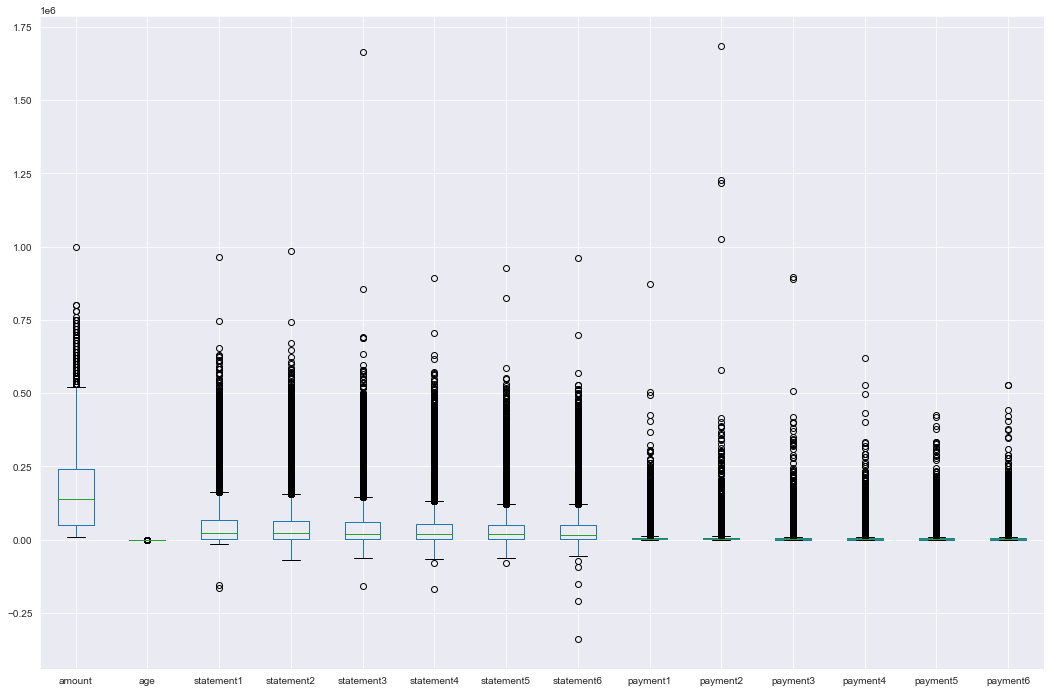

In [23]:
# Revisamos cada dimensión buscando outliers
#
x.boxplot(figsize=(18,12))
plt.show()

In [24]:
# Para continuear con nuestro análisis, debemos normalizar los datos 
# para esto usaremos una librería de sklearn

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
scaledData = scaler.transform(x)
scaledDataDf = pd.DataFrame(scaledData)

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=14)
pca.fit(scaledData)

PCA(n_components=14)

In [26]:
x_pca = pca.transform(scaledData)


In [27]:
# Tabla de varianza acumulada
#
pcsSummary = pd.DataFrame({'Desviación Estandard': np.sqrt(pca.explained_variance_),
                          'Varianza': pca.explained_variance_ratio_,
                          'Varianza acumulada': np.cumsum(pca.explained_variance_ratio_),
                          'Varianza perdida': 1 - np.cumsum(pca.explained_variance_ratio_) 
                          }
                          )
pcsSummary
pcsSummary_df = pcsSummary

#pcsSummary_df['PC']= ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]

row_names = np.array(['PC{}'.format(i) for i in range(1, 14 + 1)])
pcsSummary.index = row_names
pcsSummary.round(4)

,Desviación Estandard,Varianza,Varianza acumulada,Varianza perdida
PC1,2.4329,0.4228,0.4228,0.5772
PC2,1.3099,0.1226,0.5453,0.4547
PC3,1.0223,0.0746,0.6200,0.3800
PC4,0.9619,0.0661,0.6861,0.3139
PC5,0.9401,0.0631,0.7492,0.2508
PC6,0.9342,0.0623,0.8115,0.1885
PC7,0.8830,0.0557,0.8672,0.1328
PC8,0.8524,0.0519,0.9191,0.0809
PC9,0.8411,0.0505,0.9696,0.0304
PC10,0.5142,0.0189,0.9885,0.0115


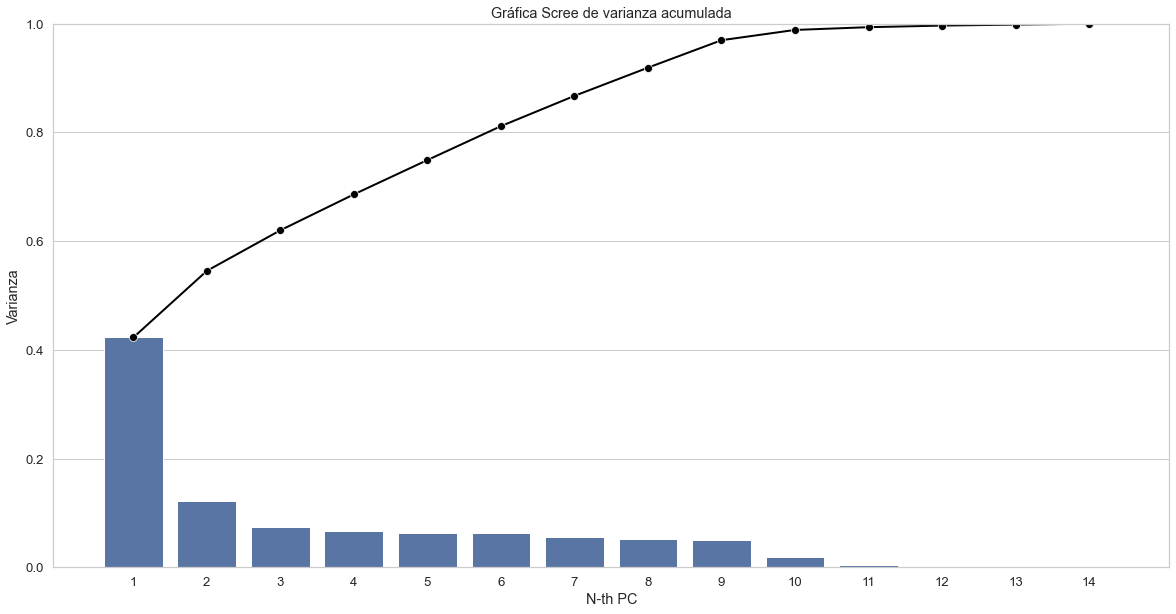

In [28]:
# También podemos visualizar la varianza acumulada en una gráfica Scree

PC_components = np.arange(pca.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid',
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(20, 10))

_ = sns.barplot(x = PC_components,
                y = pca.explained_variance_ratio_,
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1,
                 y = np.cumsum(pca.explained_variance_ratio_),
                 color = 'black',
                 linestyle = '-',
                 linewidth = 2,
                 marker = 'o',
                 markersize = 8
                 )

plt.title('Gráfica Scree de varianza acumulada')
plt.xlabel('N-th PC')
plt.ylabel('Varianza')
plt.ylim(0, 1)
plt.show()

In [29]:
pca.components_

array([[ 1.65467392e-01,  3.27840289e-02,  3.72451786e-01,
         3.83257480e-01,  3.88267290e-01,  3.91560792e-01,
         3.88508499e-01,  3.80675121e-01,  1.35111250e-01,
         1.16760454e-01,  1.28060094e-01,  1.16892109e-01,
         1.13750458e-01,  1.05475137e-01],
       [ 3.00798309e-01,  7.20294219e-02, -1.90762070e-01,
        -1.74622941e-01, -1.26882733e-01, -1.20407046e-01,
        -1.05928431e-01, -9.41679225e-02,  3.83181297e-01,
         4.08370398e-01,  3.92302236e-01,  3.49613781e-01,
         3.03908461e-01,  3.23539498e-01],
       [-3.78585907e-01, -8.69404176e-01, -3.42744882e-02,
        -1.87304601e-03,  3.47339200e-02,  3.40776042e-02,
         3.38805355e-02,  1.84780277e-02,  1.73882878e-01,
         2.01028494e-01,  1.22200498e-01,  6.23583479e-02,
        -6.09339837e-02, -5.09077461e-02],
       [-2.00022402e-01,  3.39082826e-01, -6.38786400e-02,
         7.65527339e-03,  6.05345017e-02,  7.47625831e-02,
         3.95209420e-02, -7.06384178e-02,  3.

In [30]:
pcsComponents_dfX = pd.DataFrame(pca.components_.transpose(), 
                                columns = row_names,
                                index = x.columns
                                )
pcsComponents_dfX


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
amount,0.165467,0.300798,-0.378586,-0.200022,0.035284,-0.078832,0.111146,-0.045317,-0.822064,-0.029196,-0.006209,0.015716,-0.000433,0.003341
age,0.032784,0.072029,-0.869404,0.339083,-0.039855,0.071416,-0.078753,0.027019,0.330440,-0.009048,0.000116,-0.001378,0.000130,0.001064
statement1,0.372452,-0.190762,-0.034274,-0.063879,0.041402,-0.043998,0.008159,0.009324,0.010344,0.566708,0.416051,-0.432955,-0.183768,-0.316617
statement2,0.383257,-0.174623,-0.001873,0.007655,0.083170,-0.028834,-0.032455,-0.135649,0.016687,0.386872,0.038433,0.345026,0.329408,0.645273
statement3,0.388267,-0.126883,0.034734,0.060535,0.113784,0.099222,-0.121170,0.093106,-0.018471,0.122876,-0.484809,0.495788,-0.086406,-0.527622
statement4,0.391561,-0.120407,0.034078,0.074763,0.028364,0.014530,0.126488,0.039127,0.019116,-0.205237,-0.523202,-0.489705,-0.362078,0.346043
statement5,0.388508,-0.105928,0.033881,0.039521,-0.106745,-0.099292,-0.007572,0.049746,0.023727,-0.420006,0.068410,-0.249473,0.718405,-0.226614
statement6,0.380675,-0.094168,0.018478,-0.070638,-0.164967,0.069259,0.007893,-0.000365,0.058690,-0.488868,0.513263,0.338708,-0.427776,0.072267
payment1,0.135111,0.383181,0.173883,0.362104,0.225630,0.040580,-0.201663,-0.748696,0.019024,-0.056590,0.047511,-0.069350,-0.044832,-0.084571
payment2,0.116760,0.408370,0.201028,0.345707,0.148667,0.408358,-0.278849,0.578661,-0.109896,0.050841,0.147310,-0.068844,0.038906,0.124888


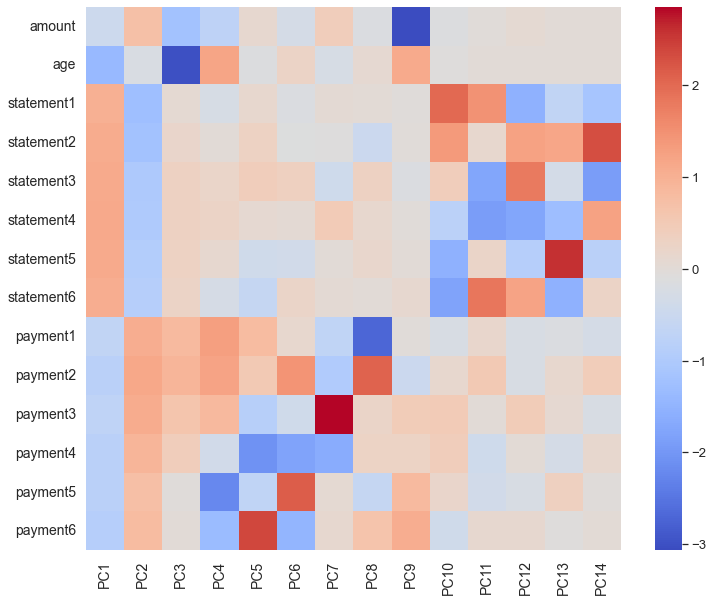

In [31]:
#Para mejor visualizar la contribución de cada dimensión original en cada componente principal, vamos a normalizar los valores de los PC.

pcsComponents_dfX_normalized=(pcsComponents_dfX-pcsComponents_dfX.mean())/(pcsComponents_dfX.std())

ax = sns.heatmap(pcsComponents_dfX_normalized, cmap="coolwarm")
ax.tick_params(labelsize=14)
ax.figure.set_size_inches((12, 10))
plt.show()

### Parte 1: Ejercicio guiado 

**Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos. Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.**  
De la tabla de varianza acumulada, podemos ver que si incluimos los primero 8 componentes estaríamos incluyendo más del 90% de la variabilidad de los datos originales.



**Paso 2: Interprete cada componente principal en términos de las variables originales Examine la magnitud y la dirección de los coeficientes de las variables originales.
Nota: Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.**  
PC1:  
En el primer componente principal PC1, las dimensiones dominantes son los pagos, los segundos componentes que más contribuyen son los estados de cuenta, es interesante ver que contribuyen de manera opuesta los pagos y los estados de cuenta.  
PC2:  
Para PC2 la contribución es similar que en PC1 solo que los signos se invierten. Las dimensiones originales más importantes para PC2 siguen siendo los pagos y los estados de cuenta.  
PC3:
En PC3 la cantidad y la edad tienen el mayor peso  
PC4 y posteriores  
Para los componentes posteriores se vuelve complicado el análisis, ya que los pesos se van distribuyendo entre todos las dimensiones originales.

**Paso 3: Identifique valores atípicos. Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.**  
En la sección anterior realizamos una gráfica de caja y bigotes de las dimensiones numéricas de nuestro conjunto de datos. Todos los datos con excepción de la edad, presentan un gran número de outliers, lo que genera una gran variabilidad de las dimensiones. Quizá esto explique por qué tenemos que incluir 8 componentes principales para representar el 90% de la variabilidad de los datos.





### Parte 2: Responde las siguientes preguntas en una celda de texto en Jupyter Notebook
**1.¿Cuál es el número de componentes mínimo y por qué?**  
8 componentes sería lo mínimo que usaríamos, estos 8 componentes contienen el 91.91% de la variabilidad del conjunto original de datos  
**2. ¿Cuál es la variación de los datos que representan esos componentes?**  
En la tabla de varianza acumulada podemos ver que el valor es: 0.9191  
**3. ¿Cuál es la pérdida de información después de realizar PCA?**  
En la tabla de varianza acumulada podemos ver que el valor es: 0.0809  
**4. De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?**  
En el mapa de calor en donde descomponemos los PC en las contribuciones de las variables originales, las que tienen mayor peso son los estados de cuenta y los pagos, después en el tercer componente principal la edad y la cantidad del crédito empiezan a tener mayor peso.  
**5. ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?**  
Se recomienda realizar PCA cuando tenemos un data set muy grande y estamos dispuestos a perder algo de información a costa de ahorrar complejidad computacional. En sets muy grandes, esto puede ser la diferencia entre horas o días de procesamiento. También es recomendable usar PCA para poder representar gráficamente la distribución de nuestros datos, esto nos puede servir para entender mejor como se asocian nuestros datos. Es importante hacer notar que PCA funciona bien con variables numéricas continuas, si nuestro set de datos es mayormente categórico, no es recomendable usar PCA.

